## Stage 1: Installing dependencies and notebook gpu setup

In [1]:
%tensorflow_version 2.x

## Stage 2: Importing dependencies for the project

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

'2.4.1'

## Stage 3: Dataset preprocessing

### Loading the Cifar10 dataset

In [3]:
#Setting class names for the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
#Loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


### Image normalization

In [5]:
X_train = X_train / 255.0

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_test = X_test / 255.0

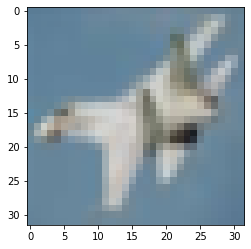

In [8]:
plt.imshow(X_test[10])

## Stage 4: Building a Convolutional neural network

### Defining the model

In [9]:
model = tf.keras.models.Sequential()

### Adding the first CNN Layer

CNN layer hyper-parameters:
- filters: 32
- kernel_size:3
- padding: same
- activation: relu
- input_shape: (32, 32, 3)


In [10]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))

### Adding the second CNN Layer and max pool layer

CNN layer hyper-parameters:
- filters: 32
- kernel_size:3
- padding: same
- activation: relu

MaxPool layer hyper-parameters:
- pool_size: 2
- strides: 2
- padding: valid

In [11]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

In [12]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Adding the third CNN Layer

CNN layer hyper-parameters:

    filters: 64
    kernel_size:3
    padding: same
    activation: relu


In [13]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

###  Adding the fourth CNN Layer and max pool layer

CNN layer hyper-parameters:

    filters: 64
    kernel_size:3
    padding: same
    activation: relu

MaxPool layer hyper-parameters:

    pool_size: 2
    strides: 2
    padding: valid


In [14]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [15]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Adding the Flatten layer

In [16]:
model.add(tf.keras.layers.Flatten())

### Adding the first Dense layer

Dense layer hyper-parameters:
- units/neurons: 128
- activation: relu

In [17]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Adding the second Dense layer (output layer)

Dense layer hyper-parameters:

 - units/neurons: 10 (number of classes)
 - activation: softmax


In [18]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

### Compiling the model

#### sparse_categorical_accuracy
sparse_categorical_accuracy checks to see if the maximal true value is equal to the index of the maximal predicted value.

https://stackoverflow.com/questions/44477489/keras-difference-between-categorical-accuracy-and-sparse-categorical-accuracy 

In [20]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam", metrics=["sparse_categorical_accuracy"])

### Training the model

In [21]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 36s 3ms/step - loss: 1.6194 - sparse_categorical_accuracy: 0.4086
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9106 - sparse_categorical_accuracy: 0.6765
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7051 - sparse_categorical_accuracy: 0.7544
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5672 - sparse_categorical_accuracy: 0.8025
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4466 - sparse_categorical_accuracy: 0.8432


### Model evaluation and prediction

In [22]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.8084 - sparse_categorical_accuracy: 0.7368


In [23]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.7368000149726868


### Homework

- Increase epochs to 15-20

- Add dropout

- Play with the optimizer and learning rates

In [24]:
model_hw = tf.keras.models.Sequential()

model_hw.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same",activation="relu",input_shape=[32,32,3]))
model_hw.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same",activation="relu"))
model_hw.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding="valid"))
model_hw.add(tf.keras.layers.Dropout(0.2))
model_hw.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))
model_hw.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))
model_hw.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding="valid"))
model_hw.add(tf.keras.layers.Dropout(0.2))
model_hw.add(tf.keras.layers.Flatten())
model_hw.add(tf.keras.layers.Dense(units=128,activation="relu"))
model_hw.add(tf.keras.layers.Dense(units=10,activation="softmax"))

model_hw.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)         

In [25]:
model_hw.compile(loss="sparse_categorical_crossentropy",optimizer="Adam",metrics=["sparse_categorical_accuracy"])

In [26]:
model_hw.fit(X_train,y_train,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 6s 3ms/step - loss: 1.7146 - sparse_categorical_accuracy: 0.3675
Epoch 2/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0382 - sparse_categorical_accuracy: 0.6327
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8279 - sparse_categorical_accuracy: 0.7127
Epoch 4/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7263 - sparse_categorical_accuracy: 0.7449
Epoch 5/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6393 - sparse_categorical_accuracy: 0.7753
Epoch 6/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5833 - sparse_categorical_accuracy: 0.7948
Epoch 7/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5249 - sparse_categorical_accuracy: 0.8139
Epoch 8/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4772 - sparse_categorical_accuracy: 0.8307
Epoch 9/20
1563/1563 [==========

In [27]:
test_loss_hw,test_accuracy_hw= model_hw.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9696 - sparse_categorical_accuracy: 0.7566


In [28]:
print("Test accuracy: {}".format(test_accuracy_hw))

Test accuracy: 0.756600022315979
